<a href="https://colab.research.google.com/github/iremsonmezgul/YOLOv8/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO

In [3]:
from IPython.display import display, Image
from IPython.display import Image as show_image

In [4]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

In [5]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KBHSmm5hrlzN93is5Y53")
project = rf.workspace("logos-w4arv").project("fcb_rm_sponsors")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.18, to fix: `pip install ultralytics==8.0.196`


In [7]:
!yolo task= detect mode = train model= yolov8n.pt data=/content/FCB_RM_Sponsors-8/data.yaml epochs=40 imgsz=640

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/FCB_RM_Sponsors-8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [8]:
!yolo task= detect mode = val model= /content/runs/detect/train/weights/best.pt data=/content/FCB_RM_Sponsors-8/data.yaml

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/FCB_RM_Sponsors-8/valid/labels.cache... 181 images, 56 backgrounds, 0 corrupt: 100% 181/181 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 391. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:08<00:00,  1.36it/s]
                   all        181        391      0.806       0.74      0.773      0.419
                Adidas        181         72      0.851      0.681      0.703      0.375
              Emirates        181         54      0.704      0.889      0.856      0.512
                  Nike        181     

In [9]:
!yolo task=detect mode= predict model=/content/runs/detect/train/weights/best.pt source=/content/FCB_RM_Sponsors-8/test/images

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/91 /content/FCB_RM_Sponsors-8/test/images/1656318728735_jpg.rf.bfdda93363199df89484c1d44e7459d5.jpg: 640x640 3 Nikes, 7 Spotifys, 12.1ms
image 2/91 /content/FCB_RM_Sponsors-8/test/images/307de4dd-8d34-4808-9c3f-ec2679ae894f_source-aspect-ratio_default_0_jpg.rf.0084a0e43115555e61cbd6fea67ddad8.jpg: 640x640 1 Nike, 8.0ms
image 3/91 /content/FCB_RM_Sponsors-8/test/images/645d3a7a13e33_jpeg.rf.2290878c123eb432718c8f695665c6d9.jpg: 640x640 1 Nike, 3 Spotifys, 7.4ms
image 4/91 /content/FCB_RM_Sponsors-8/test/images/almeria-spain-vinicius-junior-of-real-madrid-celebrates-after-scoring-the-teams-third-goal_jpg.rf.c17e17fb86e523c968ccff6da99833ac.jpg: 640x640 1 Adidas, 1 Emirates, 7.3ms
image 5/91 /content/FCB_RM_Sponsors-8/test/images/barcelona-spain-joao-felix-of-fc-barcelona-celebrates-after-scoring-the-teams-second-goa

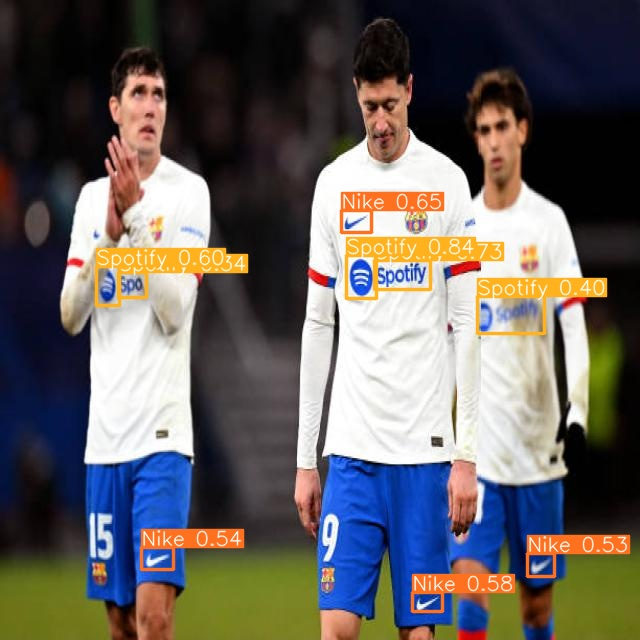

In [10]:
Image(filename=f'/content/runs/detect/predict/hamburg-germany-robert-lewandowski-of-fc-barcelona-looks-dejected-after-the-uefa-champions_jpg.rf.8bbd77b7edd3b036a11f74dc3dc4bd90.jpg', width=500)